In [45]:
import pandas as pd
import importlib
import matplotlib.pyplot as plt
import stumpy
import numpy as np
import utils
importlib.reload(utils)
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

<module 'utils' from 'c:\\LocalData\\pabflore\\encoder-pacman\\utils.py'>

In [46]:
user_df, ip_df, redcap_df, game_df, gamestate_df, psychometrics_df = utils.read_data()

gamestate_df.columns

Index(['game_state_id', 'game_id', 'time_elapsed', 'score', 'lives',
       'pacman_attack', 'input_direction', 'movement_direction', 'Pacman_X',
       'Pacman_Y', 'Ghost1_X', 'Ghost1_Y', 'Ghost2_X', 'Ghost2_Y', 'Ghost3_X',
       'Ghost3_Y', 'Ghost4_X', 'Ghost4_Y', 'ghost1_state', 'ghost2_state',
       'ghost3_state', 'ghost4_state', 'powerPellets', 'pellets',
       'powerpelletstate_1', 'powerpelletstate_2', 'powerpelletstate_3',
       'powerpelletstate_4', 'fruitState_1', 'fruitState_2', 'fruitState_2.1'],
      dtype='object')

In [47]:
GAME_ID = 716
SERIES_COLS = ['Pacman_X', 'Pacman_Y', 'score', 'powerPellets']

pacman_ts = gamestate_df.loc[gamestate_df['game_id'] == GAME_ID][SERIES_COLS]
pacman_ts.reset_index(drop=True, inplace=True)

for col in SERIES_COLS:
    pacman_ts[col] = pacman_ts[col].astype(float)

pacman_ts = utils.pos_mirroring(pacman_ts, return_quadrant=True)

pacman_ts.head()


,Pacman_X,Pacman_Y,score,powerPellets,quadrant
0,0.0,8.498903,0.0,4.0,3.0
1,0.0,8.498903,0.0,4.0,3.0
2,0.0,8.498903,0.0,4.0,3.0
3,0.0,8.498903,0.0,4.0,3.0
4,0.0,8.498903,0.0,4.0,3.0


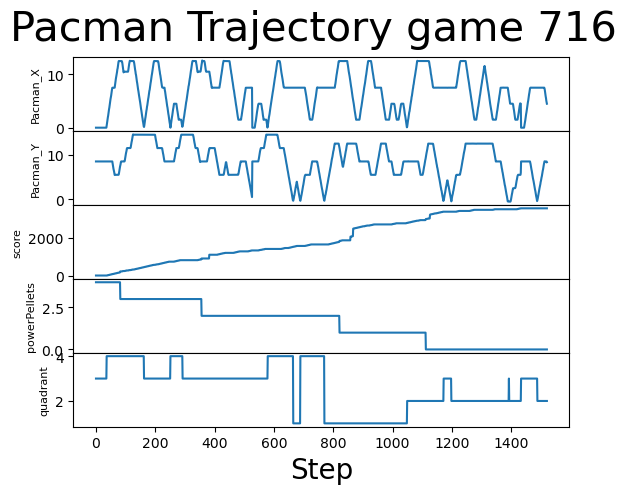

In [48]:
fig, axs = plt.subplots(pacman_ts.shape[1], sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle(f'Pacman Trajectory game {GAME_ID}', fontsize='30')

for i in range(pacman_ts.shape[1]):
    axs[i].set_ylabel(f'{pacman_ts.columns[i]}', fontsize='8')
    axs[i].set_xlabel('Step', fontsize ='20')
    axs[i].plot(pacman_ts.iloc[:,i])
    
plt.show()

In [49]:
m = 200
mps = {}  # Store the 1-dimensional matrix profiles
motifs_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)
for dim_name in pacman_ts.columns:
    mps[dim_name] = stumpy.stump(pacman_ts[dim_name], m)
    motif_distance = np.round(mps[dim_name][:, 0].astype(float).min(), 1)
    print(f"The motif pair matrix profile value in {dim_name} is {motif_distance}")
    motifs_idx[dim_name] = np.argsort(mps[dim_name][:, 0])[:2]

The motif pair matrix profile value in Pacman_X is 4.8
The motif pair matrix profile value in Pacman_Y is 4.3
The motif pair matrix profile value in score is 1.2
The motif pair matrix profile value in powerPellets is 0.0
The motif pair matrix profile value in quadrant is 0.0


c:\Users\Localadmin_pabflore\miniconda3\envs\pacman_encoder\Lib\site-packages\stumpy\core.py:3467: UserWarning: A large number of values in `P` are smaller than 1e-06.
For a self-join, try setting `ignore_trivial=True`.
  warnings.warn(msg)


In [50]:
motif_idx = np.argsort(mps[dim_name][:, 0])[0]

print(f"The motif is located at index {motif_idx}")

nearest_neighbor_idx = mps[dim_name][motif_idx, 1]

print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The motif is located at index 1189
The nearest neighbor is located at index 761


In [29]:
print(*enumerate(list(mps.keys())))

(0, 'Pacman_X') (1, 'Pacman_Y') (2, 'score') (3, 'powerPellets')


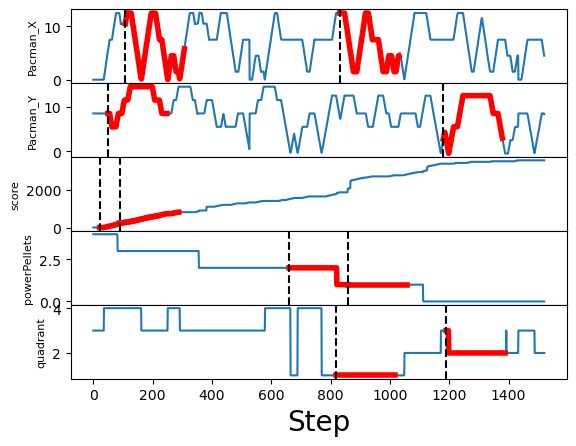

In [51]:
fig, axs = plt.subplots(len(mps), sharex=True, gridspec_kw={'hspace': 0})

for i, dim_name in enumerate(list(mps.keys())):
    axs[i].set_ylabel(dim_name, fontsize='8')
    axs[i].plot(pacman_ts[dim_name])
    axs[i].set_xlabel('Step', fontsize ='20')
    for idx in motifs_idx[dim_name]:
        axs[i].plot(pacman_ts[dim_name].iloc[idx:idx+m], c='red', linewidth=4)
        axs[i].axvline(x=idx, linestyle="dashed", c='black')
    
plt.show()

In [14]:
GAME_ID = 716
DIRECTION_COLS = ['input_direction', 'movement_direction']

direction_ts = gamestate_df.loc[gamestate_df['game_id'] == GAME_ID][DIRECTION_COLS]
direction_ts.reset_index(drop=True, inplace=True)

for col in DIRECTION_COLS:
    direction_ts[col] = direction_ts[col].map({'none': 0, 'left': 1, 'right': 2, 'up': 3, 'down': 4}).astype(float)
    direction_ts[col] = direction_ts[col].fillna(0)

direction_ts.head()

,input_direction,movement_direction
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


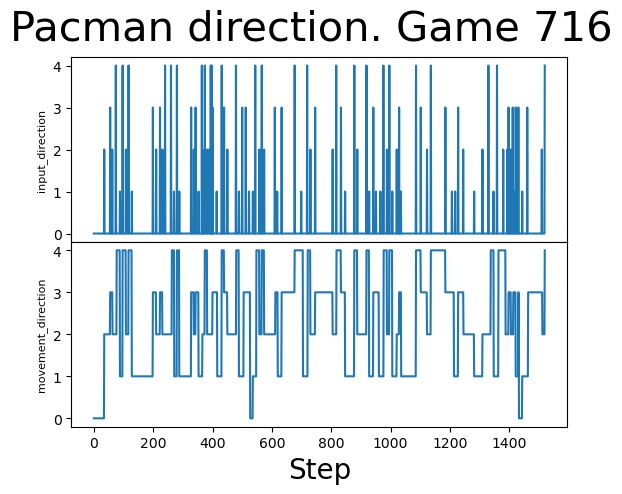

In [52]:
utils.plot_ts(direction_ts, f'Pacman direction. Game {GAME_ID}')

The motif pair matrix profile value in input_direction is 2.8
The motif pair matrix profile value in movement_direction is 3.5


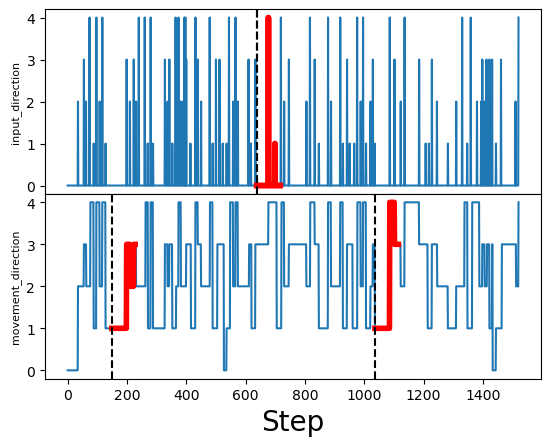

({'input_direction': mparray([[7.46390234407818, 125, -1, 125],
           [7.46390234407818, 126, -1, 126],
           [7.46390234407818, 127, -1, 127],
           ...,
           [4.2018123133918195, 1114, 1114, -1],
           [4.2018123133918195, 1115, 1115, -1],
           [6.413861398896141, 726, 726, -1]], dtype=object),
  'movement_direction': mparray([[4.780106138250858, 1429, -1, 1429],
           [4.9146525010448325, 1430, -1, 1430],
           [5.033689747254735, 1431, -1, 1431],
           ...,
           [4.847682642908414, 1111, 1111, -1],
           [4.656450190547325, 1112, 1112, -1],
           [4.956955910723685, 1113, 1113, -1]], dtype=object)},
 {'input_direction': mparray([638, 637]),
  'movement_direction': mparray([1036,  149])})

In [20]:
utils.find_motif(direction_ts, m=80, plot=True)